## Import Packages

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import zipfile as zf
import numpy as np
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')


## Gathering Data

In [ ]:
df_headers  = pd.read_html('https://www.gov.uk/guidance/about-the-price-paid-data')

col_names = df_headers[0]['Data item']

In [ ]:
pro_2020 =pd.read_csv('http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2020.csv',names = col_names)
pro_2020.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250,2020-01-28 00:00,WV12 5AB,F,Y,L,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,A,A
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500,2020-11-20 00:00,B32 4DA,T,N,F,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500,2020-10-29 00:00,WV6 9NY,F,N,L,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,A,A
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000,2020-02-04 00:00,DY2 9ET,S,N,F,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,A,A
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000,2020-03-09 00:00,CV6 1HS,S,N,F,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,B,A


In [ ]:
pro_2021 =pd.read_csv('http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2021.csv',names = col_names)
pro_2021.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{EC7AD09A-8E40-9200-E053-6C04A8C0E306},222900,2021-10-29 00:00,SW7 4DL,O,N,L,95,FOURTH FLOOR,CROMWELL ROAD,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B,A
1,{EC7AD09A-8E60-9200-E053-6C04A8C0E306},555000,2021-12-21 00:00,RM6 4NT,T,N,F,1,NaN,REYNOLDS AVENUE,CHADWELL HEATH,ROMFORD,REDBRIDGE,GREATER LONDON,B,A
2,{EC7AD09A-8E93-9200-E053-6C04A8C0E306},375000,2021-05-18 00:00,RG40 4QQ,S,N,F,21,NaN,IVANHOE ROAD,FINCHAMPSTEAD,WOKINGHAM,WOKINGHAM,WOKINGHAM,B,A
3,{EC7AD09A-8EAB-9200-E053-6C04A8C0E306},173000,2021-12-02 00:00,RG14 5HF,F,N,L,BARTHOLOMEW COURT,FLAT 31,BARTHOLOMEW STREET,NaN,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,B,A
4,{EC7AD09A-8EB9-9200-E053-6C04A8C0E306},2215000,2021-09-29 00:00,SL5 9FG,F,N,L,CHARTERS COURT,APARTMENT 16,CHARTERS ROAD,NaN,ASCOT,WINDSOR AND MAIDENHEAD,WINDSOR AND MAIDENHEAD,B,A


In [ ]:
pro_2022 = pd.read_csv('http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2022.csv',names = col_names)
pro_2022.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{E53EDD2D-F7E3-83EC-E053-6B04A8C03A59},80000,2022-06-28 00:00,L31 5JY,S,N,F,41,NaN,MOORHEY ROAD,NaN,LIVERPOOL,SEFTON,MERSEYSIDE,A,A
1,{E53EDD2D-F7E4-83EC-E053-6B04A8C03A59},215000,2022-05-30 00:00,CH46 0TP,S,N,F,16,NaN,PEMBROKE AVENUE,NaN,WIRRAL,WIRRAL,MERSEYSIDE,A,A
2,{E53EDD2D-F7E5-83EC-E053-6B04A8C03A59},78000,2022-06-10 00:00,L21 8JA,T,N,F,16,NaN,COBB AVENUE,NaN,LIVERPOOL,SEFTON,MERSEYSIDE,A,A
3,{E53EDD2D-F7E6-83EC-E053-6B04A8C03A59},270000,2022-06-21 00:00,CH63 7LT,S,N,F,9,NaN,BARLOW AVENUE,NaN,WIRRAL,WIRRAL,MERSEYSIDE,A,A
4,{E53EDD2D-F7E8-83EC-E053-6B04A8C03A59},161500,2022-06-16 00:00,L21 7PE,S,N,F,9,NaN,MARINA AVENUE,NaN,LIVERPOOL,SEFTON,MERSEYSIDE,A,A


In [ ]:
pro_data = [pro_2020, pro_2021, pro_2022]

In [ ]:
frames = [file for file in pro_data]
df = pd.concat(frames, ignore_index= True)
print(df.shape)
df.head()

(2557296, 16)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250,2020-01-28 00:00,WV12 5AB,F,Y,L,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,A,A
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500,2020-11-20 00:00,B32 4DA,T,N,F,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500,2020-10-29 00:00,WV6 9NY,F,N,L,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,A,A
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000,2020-02-04 00:00,DY2 9ET,S,N,F,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,A,A
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000,2020-03-09 00:00,CV6 1HS,S,N,F,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,B,A


In [ ]:
#changing the date of transfer to datetime format and filter out the date 
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
df = df[(df['Date of Transfer'] >= "2020-01-31") & (df['Date of Transfer'] <= "2022-09-30")]

## Data Wrangling

In [ ]:
#checking for data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491663 entries, 1 to 2557295
Data columns (total 16 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction unique identifier      object        
 1   Price                              int64         
 2   Date of Transfer                   datetime64[ns]
 3   Postcode                           object        
 4   Property Type                      object        
 5   Old/New                            object        
 6   Duration                           object        
 7   PAON                               object        
 8   SAON                               object        
 9   Street                             object        
 10  Locality                           object        
 11  Town/City                          object        
 12  District                           object        
 13  County                             object        
 14  PP

In [ ]:
#checking for null value
df.isnull().sum()

Transaction unique identifier              0
Price                                      0
Date of Transfer                           0
Postcode                                7747
Property Type                              0
Old/New                                    0
Duration                                   0
PAON                                       0
SAON                                 2193345
Street                                 47167
Locality                             1539575
Town/City                                  0
District                                   0
County                                     0
PPD Category Type                          0
Record Status - monthly file only          0
dtype: int64

In [ ]:
#checking for duplicate
df.duplicated().sum()

0

### Quality issues

- change price data type from integer to float
- change date to timestamp
- Rename the following columns from acronyms to their full meaning: 
    > <ol>
            <li>Property type</li> 
            <li>old/new</li>
            <li>Duration</li>
            <li>PPD</li>
    <li>Category Type</li>
      </ol>

In [ ]:
#checking for columns
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Postcode', 'Property Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPD Category Type', 'Record Status - monthly file only'],
      dtype='object')

### change the property type value from acronyms to their full meaning

In [ ]:
#checking property type unique value
df['Property Type'].unique()

array(['T', 'F', 'S', 'D', 'O'], dtype=object)

In [ ]:
#changing the property type value from acronyms to their full meaning
df['Property Type'].replace('F', 'Flats/Maisonettes', inplace= True)
df['Property Type'].replace('T', 'Terraced', inplace= True)
df['Property Type'].replace('D', 'Detached', inplace= True )
df['Property Type'].replace('S', 'Semi-Detached', inplace= True )
df['Property Type'].replace('O', 'Other', inplace= True)

In [ ]:
df['Property Type'].unique()

array(['Terraced', 'Flats/Maisonettes', 'Semi-Detached', 'Detached',
       'Other'], dtype=object)

### change the old/new value from acronyms to their full meaning

In [ ]:
df['Old/New'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
#changing the Old/new value from acronyms to their full meaning
df['Old/New'].replace('N', 'Newly built', inplace = True)
df['Old/New'].replace('Y', 'established residential', inplace = True)

In [ ]:
df['Old/New'].unique()

array(['Newly built', 'established residential'], dtype=object)

### change the duration value from acronyms to their full meaning

In [ ]:
df['Duration'].unique()  

array(['F', 'L'], dtype=object)

In [ ]:
#changing the duration value from acronyms to their full meaning
df['Duration'].replace('L', 'Leasehold', inplace = True)
df['Duration'].replace('F', 'Freehold', inplace= True)

In [ ]:
df['Duration'].unique()

array(['Freehold', 'Leasehold'], dtype=object)

### change the PPD value from acronyms to their full meaning

In [ ]:
#changing the PPD value from acronyms to their full meaning¶
df['PPD Category Type'].unique()

array(['A', 'B'], dtype=object)

In [ ]:
df['PPD Category Type'].replace('A', 'Standard Price', inplace = True)

In [ ]:
df['PPD Category Type'].replace('B', 'Additional Price', inplace = True)

In [ ]:
df['PPD Category Type'].unique()

array(['Standard Price', 'Additional Price'], dtype=object)

In [ ]:
#renaming the country column
df.rename(columns = {'County':'Country'}, inplace = True)

In [ ]:
df.isnull().sum()

Transaction unique identifier              0
Price                                      0
Date of Transfer                           0
Postcode                                7747
Property Type                              0
Old/New                                    0
Duration                                   0
PAON                                       0
SAON                                 2193345
Street                                 47167
Locality                             1539575
Town/City                                  0
District                                   0
Country                                    0
PPD Category Type                          0
Record Status - monthly file only          0
dtype: int64

### Change Price data type from Integer to float

In [ ]:
#changing price data type to float
df['Price'] = df['Price'].astype('float')

In [ ]:
df['Price'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491663 entries, 1 to 2557295
Data columns (total 16 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction unique identifier      object        
 1   Price                              float64       
 2   Date of Transfer                   datetime64[ns]
 3   Postcode                           object        
 4   Property Type                      object        
 5   Old/New                            object        
 6   Duration                           object        
 7   PAON                               object        
 8   SAON                               object        
 9   Street                             object        
 10  Locality                           object        
 11  Town/City                          object        
 12  District                           object        
 13  Country                            object        
 14  PP

### Change date column data type from Object to timestamp


In [ ]:
#drop record status column in our data
df.drop(columns = 'Record Status - monthly file only', inplace = True)

##  Exploration

In [ ]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price


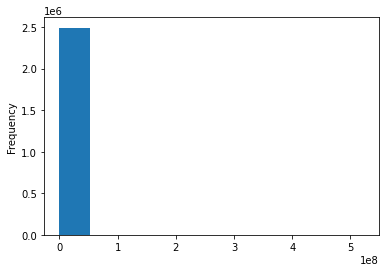

In [ ]:
#examining the dataframe distribution
df['Price'].plot(kind = 'hist');

**The data points are concentrated within a particular region; this shows the presence of outliers.**

### Summary statistics

In [ ]:
df['Price'].describe()

count    2.491663e+06
mean     3.799747e+05
std      1.509759e+06
min      1.000000e+00
25%      1.655000e+05
50%      2.600000e+05
75%      4.050000e+05
max      5.230000e+08
Name: Price, dtype: float64

## Removing the Outliers

In [ ]:
#Removing the outliers using quantile
low,high = df['Price'].quantile([0.05, 0.8])
mask_out = df[df['Price'].between(low,high)]
df = mask_out

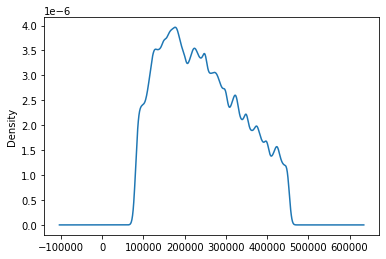

In [ ]:
#checking for the distribution
df['Price'].plot(kind = 'density');

In [ ]:
df['Price'].describe()

count    1.871539e+06
mean     2.417976e+05
std      9.669173e+04
min      8.100000e+04
25%      1.620000e+05
50%      2.300000e+05
75%      3.150000e+05
max      4.500000e+05
Name: Price, dtype: float64

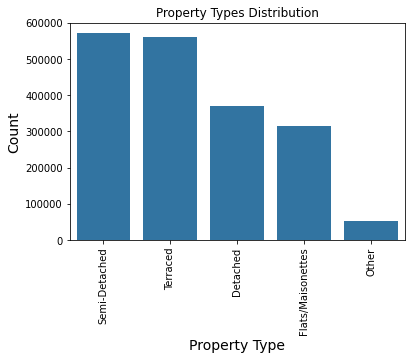

In [ ]:
#Property type distribution
color_base = sb.color_palette()[0]
order_base = df['Property Type'].value_counts().index
sb.countplot(data= df, x= 'Property Type', color = color_base, order = order_base);
plt.xticks(rotation = 90);
plt.xlabel('Property Type', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Property Types Distribution');


Semi-detached has the highest sales, with a count above 500,000. Terraced has the second highest sales, with a count of over 500,000. Detached has the third highest sales, with a count of around 350,000. Flats and maisonettes have the fourth highest sales, with around 300,000 units, while other property types have less than 100,000 count. 


In [ ]:
def pie_chart(columnN):
    sorted_counts = df[columnN].value_counts()
    plt.pie(sorted_counts, labels= sorted_counts.index, startangle= 90, counterclock= False, autopct='%1.2f%%');
    plt.title(columnN + ' ' + 'Distribution');
    

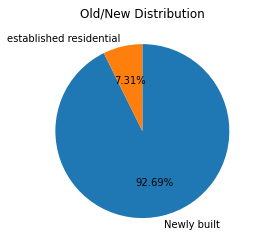

In [ ]:
pie_chart('Old/New')

There is a distribution of 92.69% for newly built residential, while already established residential has a distribution of 7.31%. Hence, there are more new residential than already established residential.

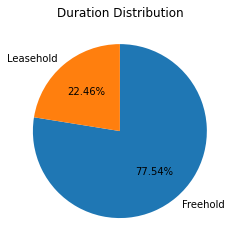

In [ ]:
pie_chart('Duration')

There is a distribution of 22.46% for leasehold, while freehold has 77.54%. Hence, there are more people with freehold than leasehold.

In [ ]:
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Postcode', 'Property Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'Country',
       'PPD Category Type'],
      dtype='object')

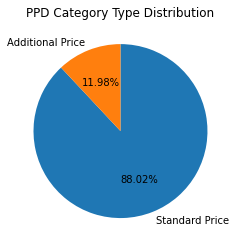

In [ ]:
pie_chart('PPD Category Type')

We have 88.02% for the standard price and 11.98% for the additional price.

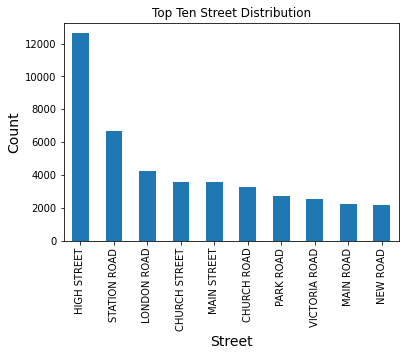

In [ ]:
def top10(Vname):
    bar = df[Vname].value_counts()[:10].plot(kind = 'bar')
    plt.xlabel(Vname, fontsize = 14)
    plt.ylabel('Count', fontsize = 14);
    plt.title('Top Ten' + ' ' +  Vname + ' ' + 'Distribution');
    return bar

top10('Street');

The top 10 street distributions are: High Street, Station Road, London Road, Church Street, Main Street, Church Road, Park Road, Victoria Road, Main Road, and New Road. There are 12623 counts for the high street, 6675 counts for station road, around 4249 counts for London Road, 3588 counts for Church Street, 3565 counts for Main Street, 3269 counts for Church Road, 2703 counts for Park Road, 2509 counts for Victoria Road, 2242 counts for Main Road, and 2191 counts for New Road.




In [ ]:
df['Street'].value_counts()[:10]

HIGH STREET      12623
STATION ROAD      6675
LONDON ROAD       4249
CHURCH STREET     3588
MAIN STREET       3565
CHURCH ROAD       3269
PARK ROAD         2703
VICTORIA ROAD     2509
MAIN ROAD         2242
NEW ROAD          2191
Name: Street, dtype: int64

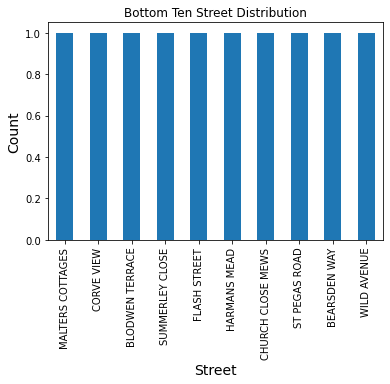

In [ ]:
def bottom10(Vname):
    bar = df[Vname].value_counts(ascending=True)[:10].plot(kind = 'bar')
    plt.xlabel(Vname, fontsize = 14)
    plt.ylabel('Count', fontsize = 14);
    plt.title('Bottom Ten' + ' ' + Vname + ' '  + 'Distribution');
    return bar

bottom10('Street');

In [ ]:
df['Street'].value_counts(ascending=True)[:10].index

Index(['MALTERS COTTAGES', 'CORVE VIEW', 'BLODWEN TERRACE', 'SUMMERLEY CLOSE',
       'FLASH STREET', 'HARMANS MEAD', 'CHURCH CLOSE MEWS', 'ST PEGAS ROAD',
       'BEARSDEN WAY', 'WILD AVENUE'],
      dtype='object')

The following have the least count: MALTERS COTTAGES, CORVE VIEW, BLODWEN TERRACE, SUMMERLEY CLOSE, FLASH STREET, HARMANS MEAD, CHURCH CLOSE MEWS, ST PEGAS ROAD, BEARSDEN WAY, WILD AVENUE

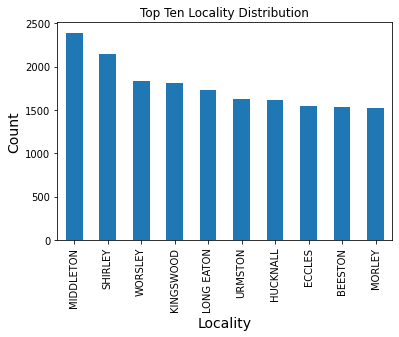

In [ ]:
top10('Locality');

The top 10 localities are: Middleton, Shirley, Kingswood, Worsley, Long Eaton, Hucknail, Eccles, Moreley, Urmston, and Beeston. Middleton has 2392 counts, Shirley has 2150 counts, Worsley has 1832 counts, Kingswood has 1812 counts, Long Eaton has 1737 counts,  Urmston has 1623 counts, Hucknail has 1612, Eccles has 1544 counts, Morley has 1519 counts, and Beeston has 1540 counts.

In [ ]:
df['Locality'].value_counts()[:10]

MIDDLETON     2392
SHIRLEY       2150
WORSLEY       1832
KINGSWOOD     1812
LONG EATON    1737
URMSTON       1623
HUCKNALL      1612
ECCLES        1544
BEESTON       1540
MORLEY        1519
Name: Locality, dtype: int64

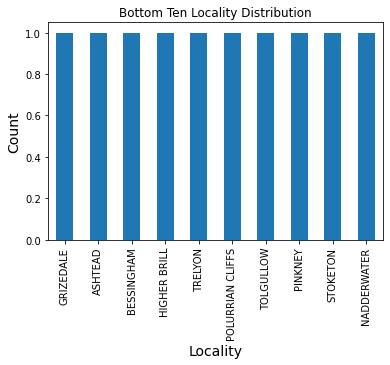

In [ ]:
bottom10('Locality');

The following have the least count: GRIZEDALE, ASHTEAD, BESSINGHAM, HIGHER BRILL, TRELYON, POLURRIAN CLIFFS, TOLGULLOW, PINKNEY, STOKETON, NADDERWATER

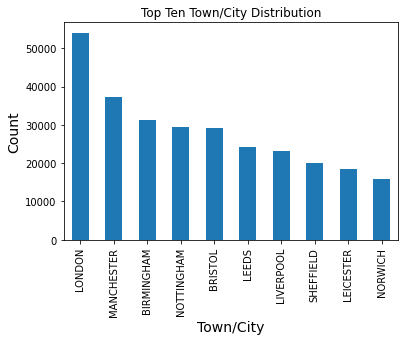

In [ ]:
top10('Town/City');


The top 10 cities are: London, Manchester, Birmingham, Nottingham, Bristol, Liverpool, Leeds, Sheffield, Leicester, and Norwich. London has 54048 counts, Manchester has 37340 counts, Birmingham has 31271 counts, Nottingam has 29427 counts, Bristol has 29287 counts, Leeds has 24271 counts, Liverpool has 23124 counts, Sheffield has 20108 counts, Leicester has 18516 counts, and Norwich has 15941 counts.

In [ ]:
df['Town/City'].value_counts()[:10]

LONDON        54048
MANCHESTER    37340
BIRMINGHAM    31271
NOTTINGHAM    29427
BRISTOL       29287
LEEDS         24271
LIVERPOOL     23124
SHEFFIELD     20108
LEICESTER     18516
NORWICH       15941
Name: Town/City, dtype: int64

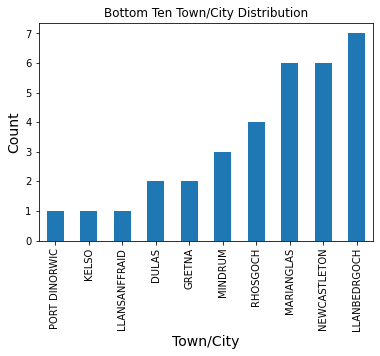

In [ ]:
bottom10('Town/City');

The following have the least count: PORT DINORWIC, KELSO, LLANSANFFRAID, DULAS, GRETNA, MINDRUM, RHOSGOCH, MARIANGLAS, NEWCASTLETON, LLANBEDRGOCH

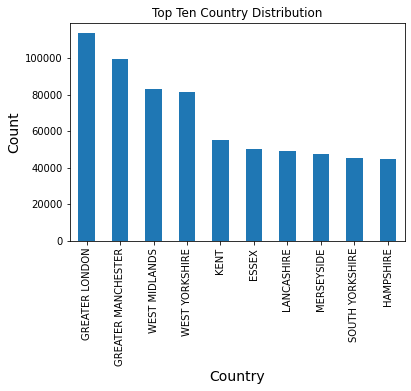

In [ ]:
top10('Country');

The top 10 countries are: Greater London, Greater Manchester, the West Midlands, West Yorkshire, Kent, Essex, Lancashire, Merseyside, South Yorkshire, and Hampshire. Greater London has a count of 113686, Greater Manchester has a count of 99549, the West Midlands has a count of 83271, West Yorkshire has a count of 81361, Kent has a count of 55070, Essex has a count of 50065, Lancashire has a count of 49181, Merseyside has a count of 47777, and South Yorkshire has a count of 45496, and Hampshire has a count of 44635.

In [ ]:
df['Country'].value_counts()[:10]

GREATER LONDON        113686
GREATER MANCHESTER     99549
WEST MIDLANDS          83271
WEST YORKSHIRE         81361
KENT                   55070
ESSEX                  50065
LANCASHIRE             49181
MERSEYSIDE             47777
SOUTH YORKSHIRE        45496
HAMPSHIRE              44635
Name: Country, dtype: int64

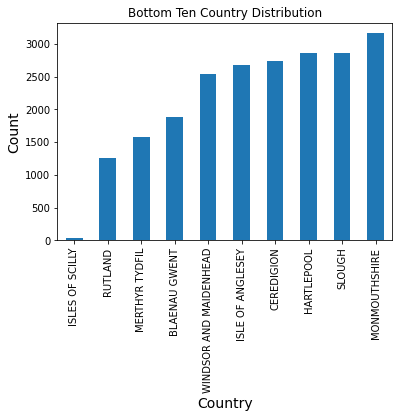

In [ ]:
bottom10('Country');

The bottom 10 countries are ISLES OF SCILLY, RUTLAND, MERTHYR TYDFIL, BLAENAU GWENT, WINDSOR AND MAIDENHEAD, ISLE OF ANGLESEY, CEREDIGION, SLOUGH, HARTLEPOOL, MONMOUTHSHIRE. Isles of scilly has a count of 28, Rutland has a count of 1257, Merthyr Tydfil has a count of 1585, Bleaneau Gwent has a count 1878, Windsor and Maidenhead has a count of 2545, Isle of Anglesey has a count of 2677, Ceredigion has a count of 2745, Slough has a count of 2858, Hartlepool has a count of 2855 and MonMouthshire has a count of 3164

In [ ]:
df['Country'].value_counts(ascending = True)[:10]

ISLES OF SCILLY             28
RUTLAND                   1257
MERTHYR TYDFIL            1585
BLAENAU GWENT             1878
WINDSOR AND MAIDENHEAD    2545
ISLE OF ANGLESEY          2677
CEREDIGION                2745
HARTLEPOOL                2855
SLOUGH                    2858
MONMOUTHSHIRE             3164
Name: Country, dtype: int64

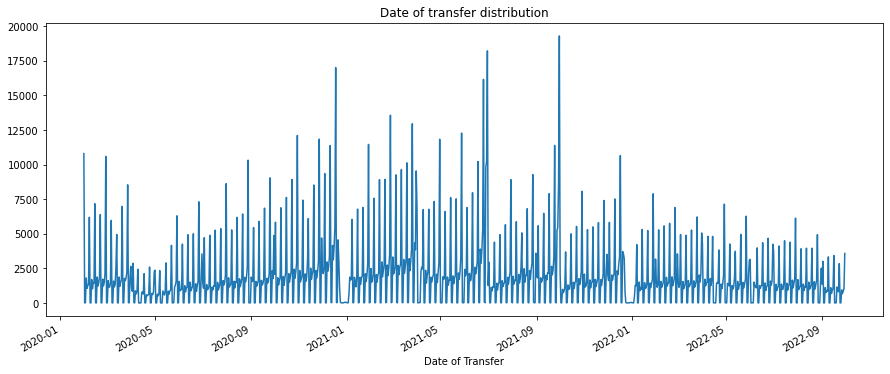

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
df['Date of Transfer'].value_counts().plot(ax = ax, xlabel = 'Date of Transfer', title = 'Date of transfer distribution');

In [ ]:
df_DIndex = df.set_index('Date of Transfer')
df_DIndex

,Transaction unique identifier,Price,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type
Date of Transfer,,,,,,,,,,,,,,
2020-11-20,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price
2020-10-29,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price
2020-02-04,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price
2020-03-09,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price
2020-02-07,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-20,{EC7AD099-7D20-9200-E053-6C04A8C0E306},90000.0,DT1 3GX,Flats/Maisonettes,Newly built,Leasehold,FLEUR-DE-LIS,APARTMENT 5,MIDDLEMARSH STREET,POUNDBURY,DORCHESTER,DORSET,DORSET,Standard Price
2022-09-30,{EC7AD099-7D22-9200-E053-6C04A8C0E306},340000.0,DT2 9AE,Terraced,Newly built,Freehold,3,NaN,MALTERS COTTAGES,LITTON CHENEY,DORCHESTER,DORSET,DORSET,Standard Price
2022-09-29,{EC7AD099-7D23-9200-E053-6C04A8C0E306},305750.0,BH16 5JH,Terraced,Newly built,Freehold,1,NaN,DACOMBE DRIVE,NaN,POOLE,DORSET,DORSET,Standard Price


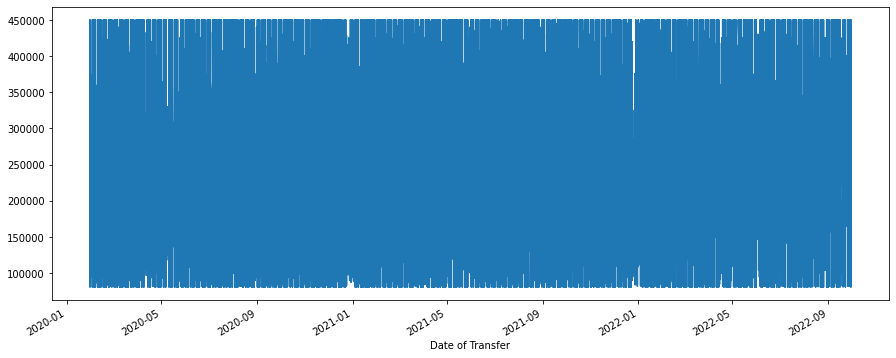

In [ ]:
df_DIndex['Price'].plot(figsize = (15,6));

### Price Trend Per Month

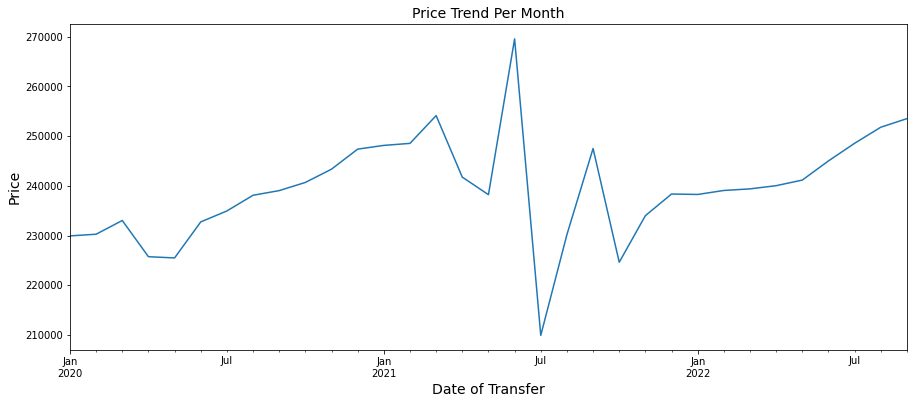

In [ ]:
P_resample_month = df_DIndex['Price'].resample('m').mean()
P_resample_month.plot(figsize = [15,6]);
plt.xlabel('Date of Transfer', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend Per Month', fontsize = 14);

The highest price happens in June 2021, with an average price of more than £260,000. The lowest price is in july 2021, with an average price below £210,000. 

### Price Trend Per Year Quartiles

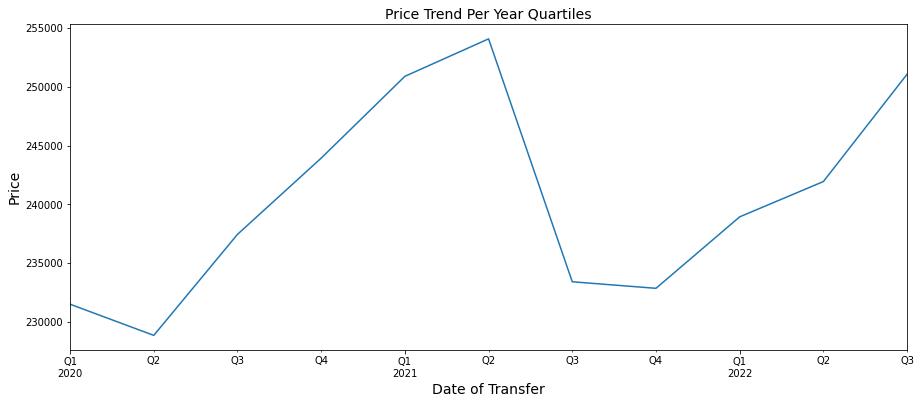

In [ ]:
P_resample_month = df_DIndex['Price'].resample('q').mean()
P_resample_month.plot(figsize = [15,6]);
plt.xlabel('Date of Transfer', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend Per Year Quartiles', fontsize = 14);

The highest price happens in the second quarter of 2021, with an average price of more than £250,000, while the lowest price happens in the second quarter of 2020, with an average price below £230,000.

### The Price Trend Per Year

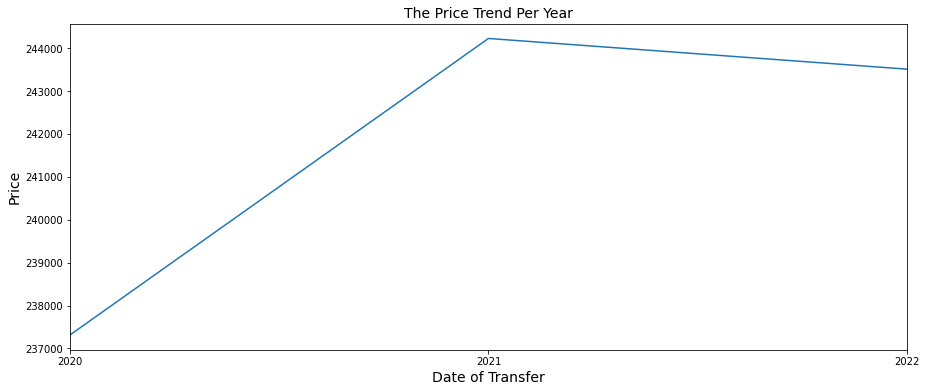

In [ ]:
P_resample_month = df_DIndex['Price'].resample('y').mean()
P_resample_month.plot(figsize = [15,6]);
plt.xlabel('Date of Transfer', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('The Price Trend Per Year', fontsize = 14);

There is a steady increase in price from 2020 to 2021 with the highest peak occurring in 2021, followed by a small drop from 2021 to 2022. Hence, 2021 has the highest price with an average price above 243000, while the lowest price happens in 2020 with a price below 23600.

In [ ]:
#extracting Month 
df['Month_Year'] = df['Date of Transfer'].dt.strftime('%Y-%m')
df.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02


In [ ]:
#masking top 5 countries
top5Country = df['Country'].value_counts()[:5].index
Ctop5Mask = df[df['Country'].isin(top5Country)]
print(Ctop5Mask.shape)
Ctop5Mask.head()

(432937, 16)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02


### Price Trend By Location

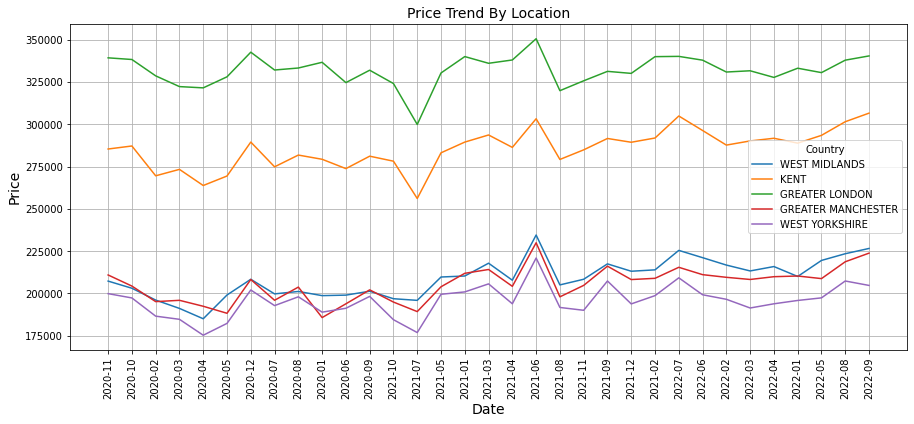

In [ ]:
#figure
plt.figure(figsize=[15,6])
#plot
sb.lineplot(data= Ctop5Mask, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)
#grid
plt.grid()
plt.xticks(rotation = 90);
#label
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend By Location', fontsize = 14);


Greater London has its highest peak in June 2021 with an average price of 350,000, while its lowest peak is in July 2021 with an average price of 300,000. Kent has its highest peak in July 2022 with an average price of around 305,000, and its lowest peak is in July 2021 with an average price of around 255,000. The West Midlands' highest peak occurs in June 2021, with an average price of around 230,000, and the lowest peak occurs in April 2020, with an average price of around 185000. Greater Manchester's highest peak occurs in June 2021, with an average price of around 227,000, and its lowest peak occurs in January 2020, with an average price of around 185000. West Yorkshire has its highest peak in June 2021 with an average price of 220,000, and its lowest peak is in March 2020 
with an average price of around 175,000. Hence, Most countries have their highest peak in June 2021 and their lowest peak in July 2021.

### Price Trend By Property Type

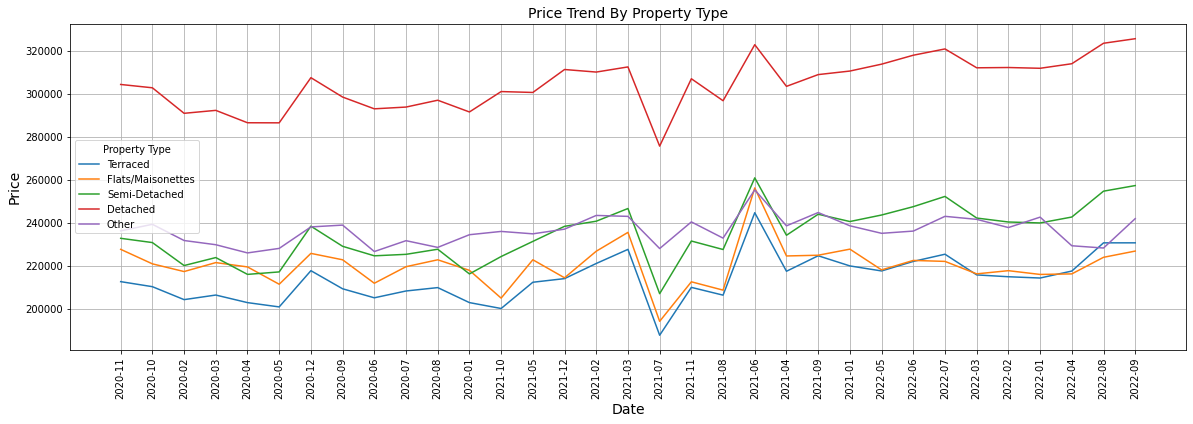

In [ ]:
#figure
plt.figure(figsize=[20,6])

#plot
sb.lineplot(data= df, x= 'Month_Year', y = 'Price', hue= 'Property Type', ci=None)

#grid
plt.grid()

#tick
plt.xticks(rotation = 90);

#label
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend By Property Type', fontsize = 14);

The detached property type reaches its highest peak in September 2022, at over £320,000, and its lowest peak is in July 2021, at around £277,000. The semi-detached property type has its highest peak in June 2021 at £261,000 and the lowest peak in July 2021 at around £210,000. The flats and maisonettes property type has its highest peak in June 2021, which is around £255,000, and its lowest peak in July 2021, which is below £195000. Terraced property has its highest peak in June 2021, which is around £243000, and its lowest peak in July 2021, which is below £190000. Hence, we can say there is a reoccurring pattern: the majority of the property types have their highest peak in June 2021, while the majority of the property types have their lowest peak in July 2021.

In [ ]:
#mask newly built
mask_newBuild = df[df['Old/New'].isin(['Newly built'])]
mask_newBuild.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02


### Trend Of Newly Built

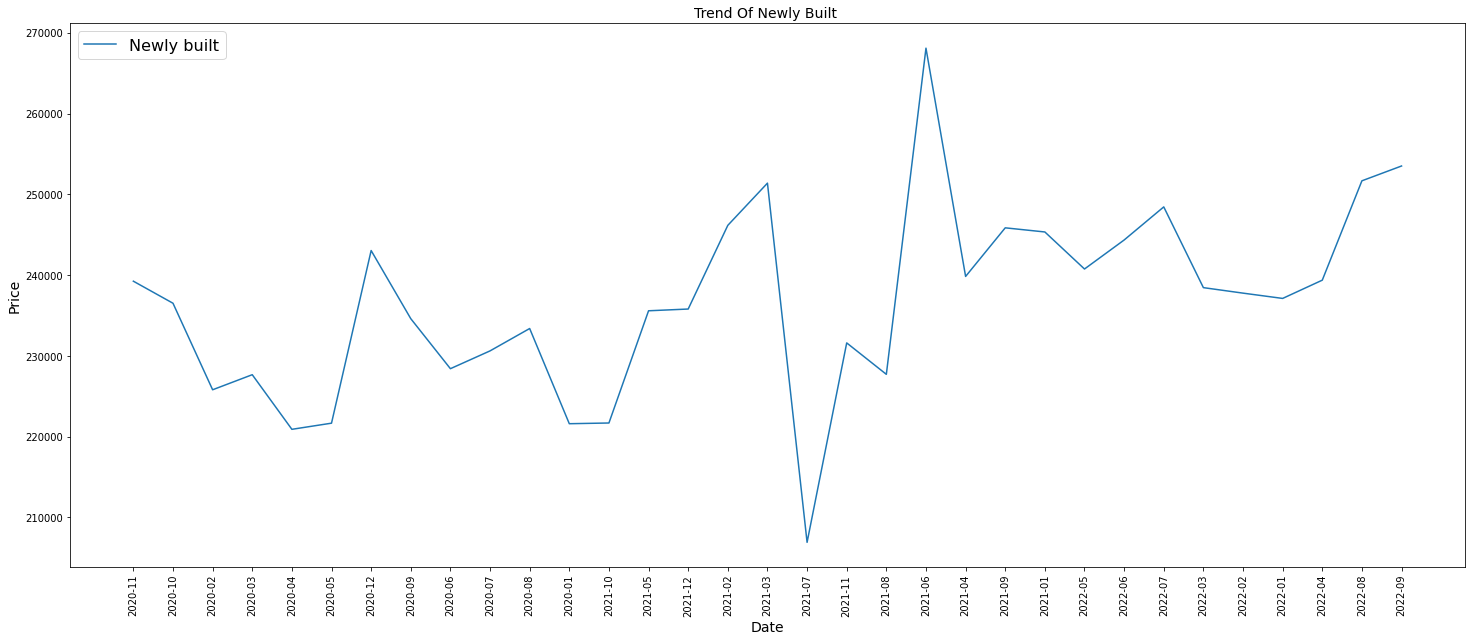

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data= mask_newBuild, x= 'Month_Year', y = 'Price', hue= 'Old/New', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='upper left', fontsize = 16);

#label
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Trend Of Newly Built ', fontsize = 14);

The newly built has its highest peak in June 2021 which is above £260000 while is lowest peak is in July 2021 and it is below £210000.  

In [ ]:
mask_newBuild['pctChange_price'] = round(mask_newBuild['Price'].pct_change()*100)
mask_newBuild.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11,NaN
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10,-45.0
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02,85.0
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03,9.0
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02,-29.0


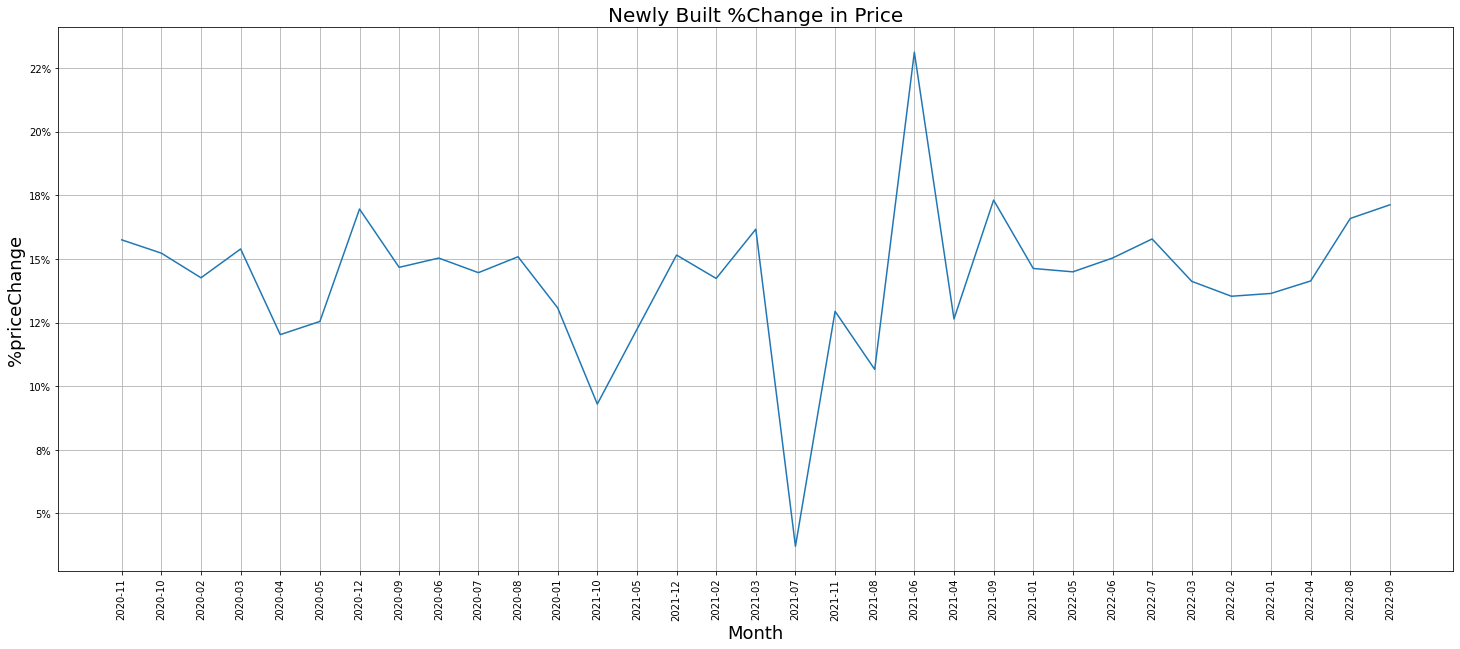

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=mask_newBuild, x= 'Month_Year', y = 'pctChange_price', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);


#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('%priceChange', fontsize = 18)
plt.title('Newly Built %Change in Price', fontsize = 20);

#grid
plt.grid();

Newly built increased by 17.8% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and increased by 24%, while the lowest peak is observed in July 2021 with a 3% growth rate.

### Sales By Newly Built

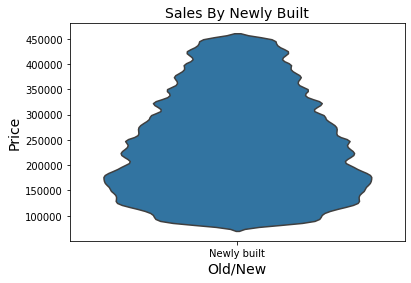

In [ ]:
color_base = sb.color_palette()[0]
sb.violinplot(data= mask_newBuild, x = 'Old/New', y = 'Price', inner= None, color= color_base);
plt.xlabel('Old/New', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Sales By Newly Built', fontsize = 14);

Newly built distribution is more concentrated a little below £200000 while its highest price is £450000.

In [ ]:
#masking country out of new build data frame
t5NewBuild = mask_newBuild[mask_newBuild['Country'].isin(top5Country)]
t5NewBuild.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11,NaN
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10,-45.0
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02,85.0
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03,9.0
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02,-29.0


In [ ]:
t5NewBuild['Country'].unique()

array(['WEST MIDLANDS', 'KENT', 'GREATER LONDON', 'GREATER MANCHESTER',
       'WEST YORKSHIRE'], dtype=object)

### Newly built house price distribution relative to price by Country

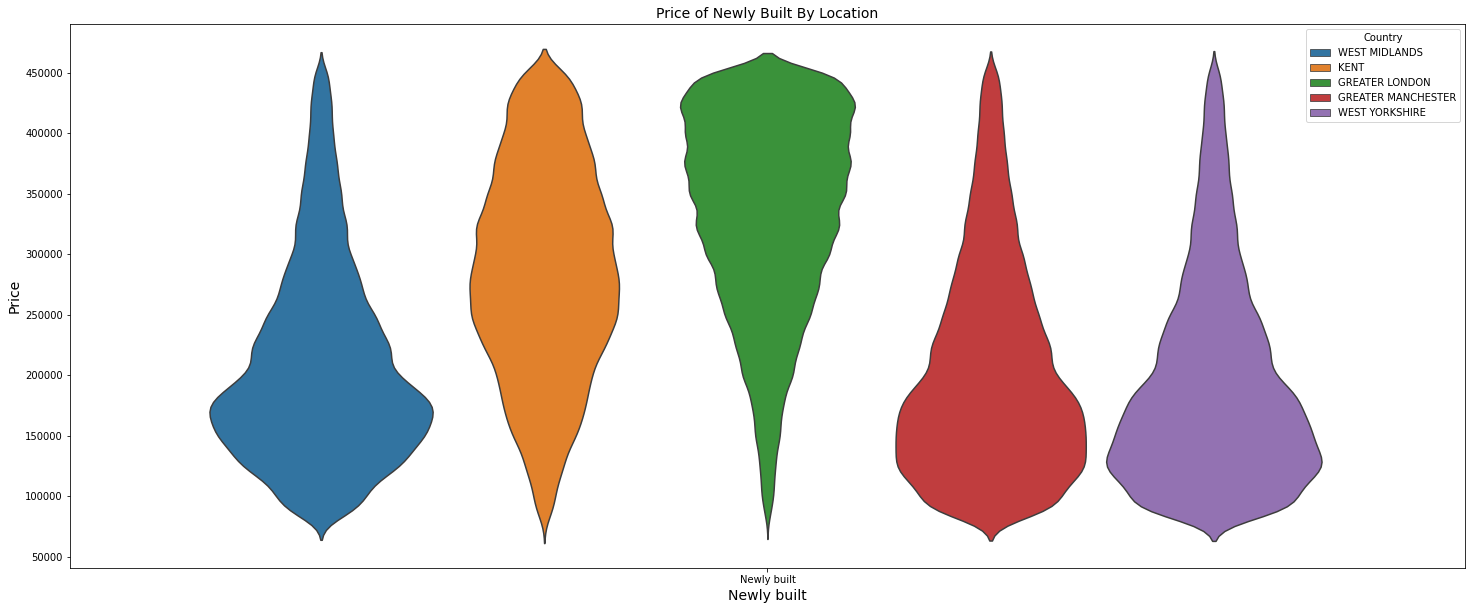

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= t5NewBuild , x = 'Old/New', y = 'Price', inner= None, hue= 'Country');
plt.xlabel('Newly built', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price of Newly Built By Location', fontsize = 14);

The five countries have their highest prices at £450,000. Greater London's price is more concentrated around 450000; Greater Manchester, West Yorkshire, and the West Midlands are more concentrated below  200,000; and Kent is more concentrated around 250000.

### Newly built house price distribution relative to price by Property type

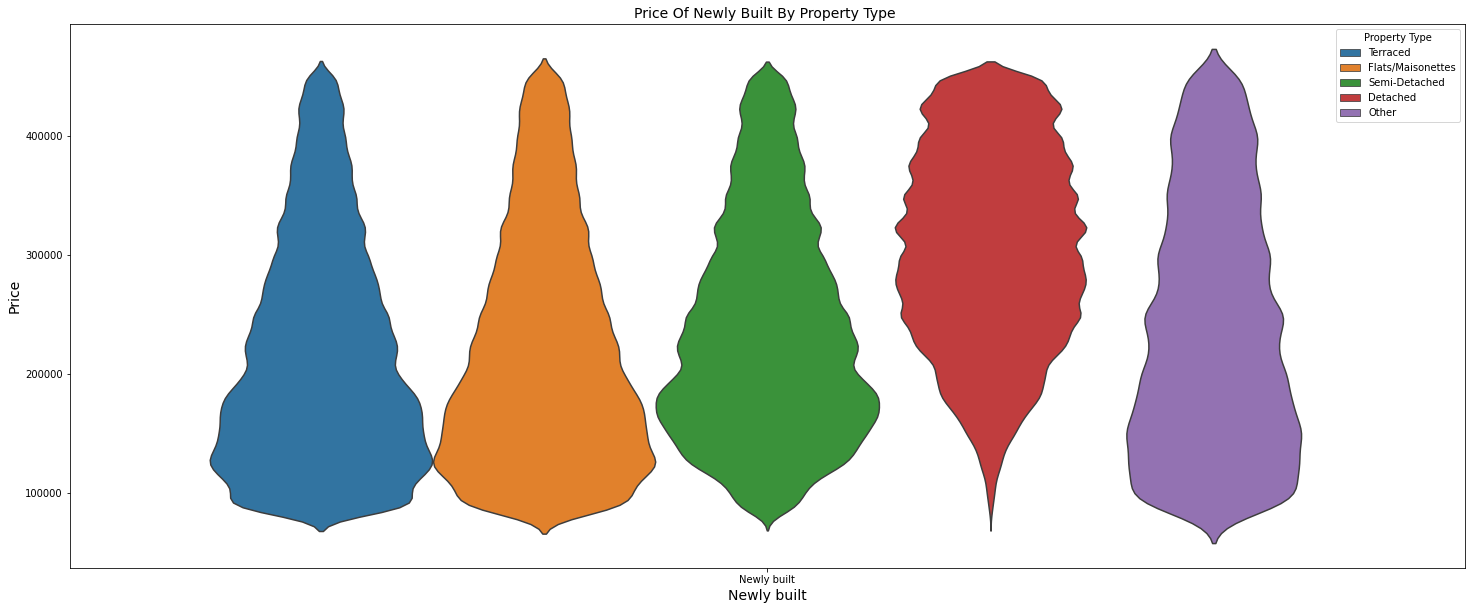

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= mask_newBuild , x = 'Old/New', y = 'Price', inner= None, hue= 'Property Type');
plt.xlabel('Newly built', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Of Newly Built By Property Type ', fontsize = 14);

The highest price for the four property types is £450,000, with detached more concentrated around £300,000, flats/maisonettes and terraced more concentrated around £130,000 and semi-detached more concentrated around £170,000. 

# Sales by Established Residential

In [ ]:
#mask established residential
mask_establish = df[df['Old/New'].isin(['established residential'])]
mask_establish.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03
20,{BC8936BB-BC47-0E2C-E053-6C04A8C0DBF4},132500.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 2,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05
21,{BC8936BB-BC48-0E2C-E053-6C04A8C0DBF4},215000.0,2020-05-07,B66 3BW,Terraced,established residential,Freehold,58,NaN,CROCKETTS LANE,NaN,SMETHWICK,SANDWELL,WEST MIDLANDS,Standard Price,2020-05
23,{BC8936BB-BC4A-0E2C-E053-6C04A8C0DBF4},110000.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 1,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05
305,{BC8936BB-AE69-0E2C-E053-6C04A8C0DBF4},249995.0,2020-04-17,PR5 6FW,Detached,established residential,Freehold,18,NaN,GREY GABLES AVENUE,BAMBER BRIDGE,PRESTON,SOUTH RIBBLE,LANCASHIRE,Standard Price,2020-04


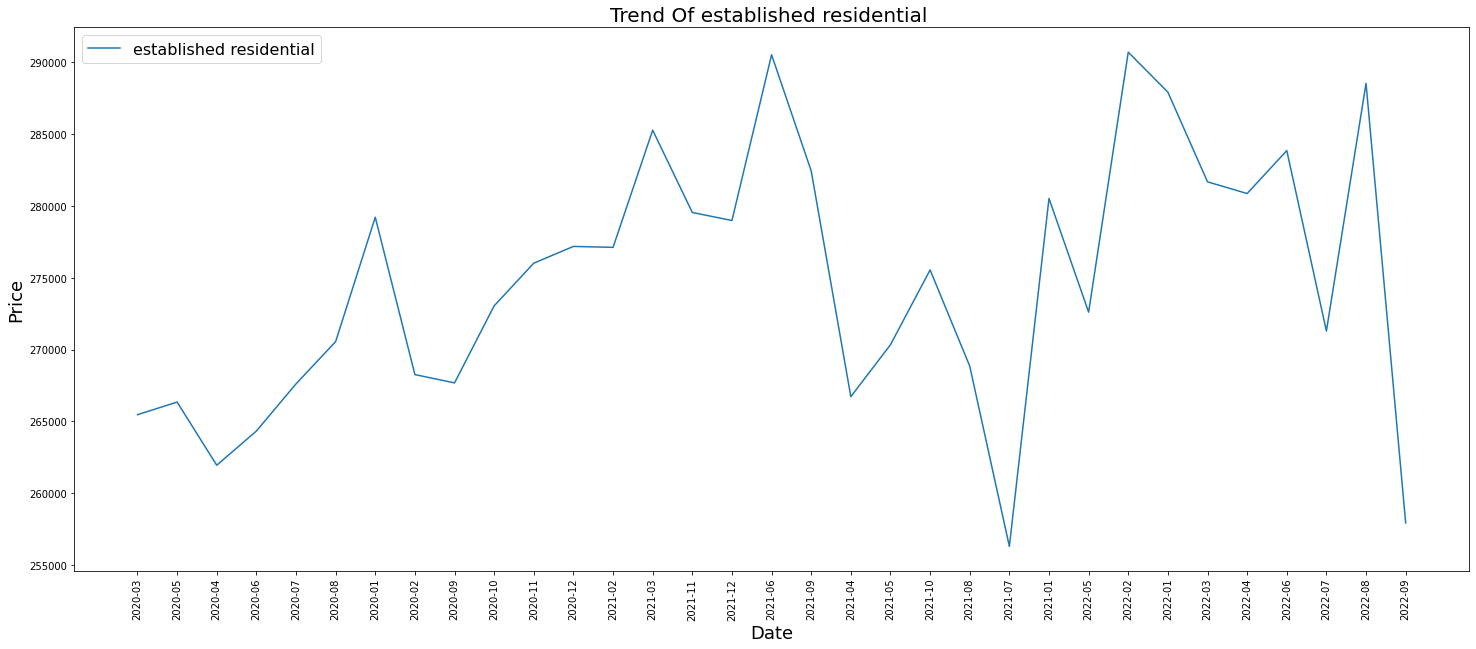

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data=mask_establish, x= 'Month_Year', y = 'Price', hue= 'Old/New', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='upper left', fontsize = 16);

#label
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.title('Trend Of established residential ', fontsize = 20);

 The lowest peak is observed in July 2021 with an average price of £255000, while the highest peak is observed in February 2022 with an average price of £290000.

In [ ]:
mask_establish['pctChange_price'] = round(mask_establish['Price'].pct_change()*100)
mask_newBuild.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11,NaN
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10,-45.0
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02,85.0
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03,9.0
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02,-29.0


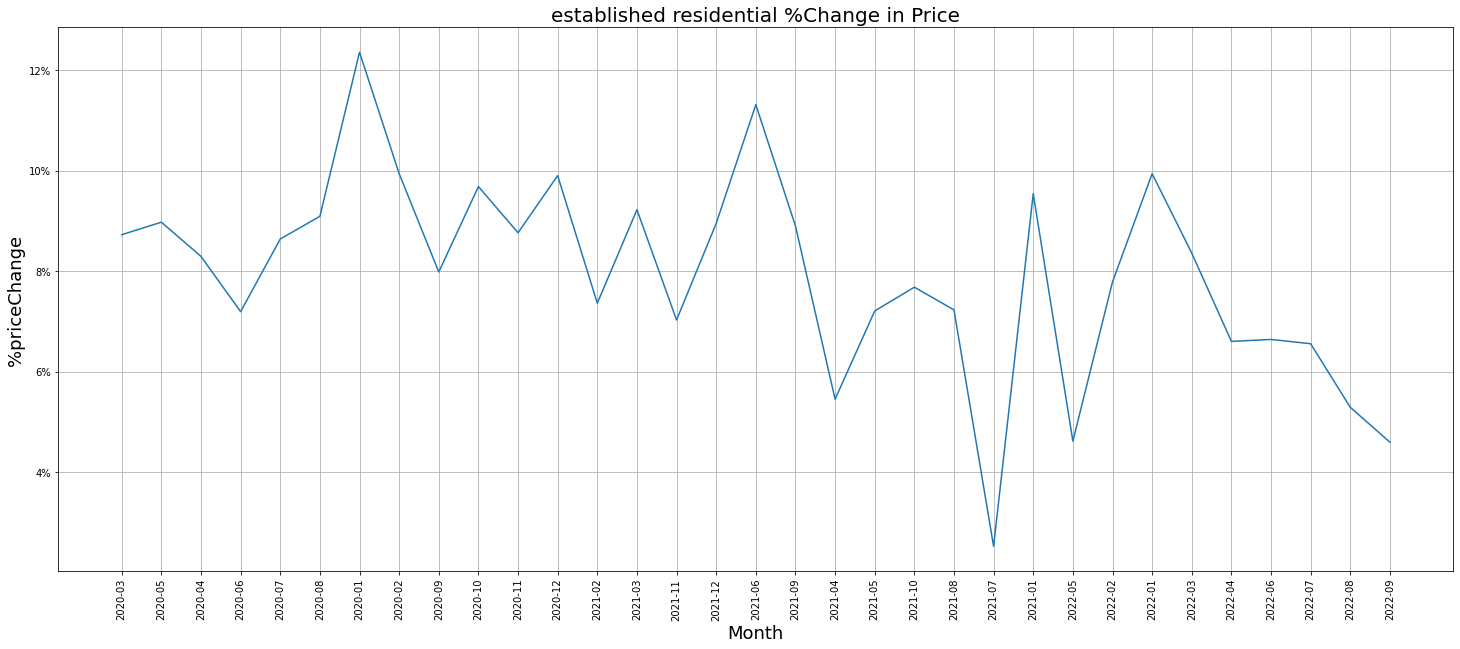

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=mask_establish, x= 'Month_Year', y = 'pctChange_price', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);


#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('%priceChange', fontsize = 18)
plt.title('established residential %Change in Price', fontsize = 20);

#grid
plt.grid();

In the year to September 2022, established residential increased by 4.5%. The highest peak of the price growth is observed in January 2022 and increased by 12.5%, while the lowest peak is observed in July 2021 with a 3% growth rate.


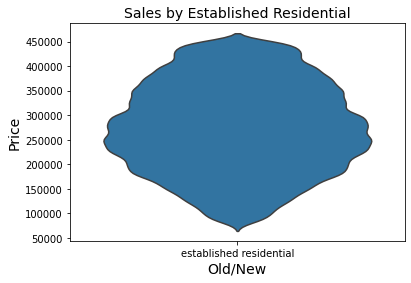

In [ ]:
color_base = sb.color_palette()[0]
sb.violinplot(data= mask_establish, x = 'Old/New', y = 'Price', inner= None, color= color_base);
plt.xlabel('Old/New', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Sales by Established Residential', fontsize = 14);

Established residential distribution is more concentrated around £250000 while its highest price is £450000.

In [ ]:
#masking country out of new establish residential data frame
t5NewEstablish = mask_establish[mask_establish['Country'].isin(top5Country)]
mask_establish.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03,NaN
20,{BC8936BB-BC47-0E2C-E053-6C04A8C0DBF4},132500.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 2,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05,-32.0
21,{BC8936BB-BC48-0E2C-E053-6C04A8C0DBF4},215000.0,2020-05-07,B66 3BW,Terraced,established residential,Freehold,58,NaN,CROCKETTS LANE,NaN,SMETHWICK,SANDWELL,WEST MIDLANDS,Standard Price,2020-05,62.0
23,{BC8936BB-BC4A-0E2C-E053-6C04A8C0DBF4},110000.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 1,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05,-49.0
305,{BC8936BB-AE69-0E2C-E053-6C04A8C0DBF4},249995.0,2020-04-17,PR5 6FW,Detached,established residential,Freehold,18,NaN,GREY GABLES AVENUE,BAMBER BRIDGE,PRESTON,SOUTH RIBBLE,LANCASHIRE,Standard Price,2020-04,127.0


## Established Residential House Price Distribution Relative to Price by Country


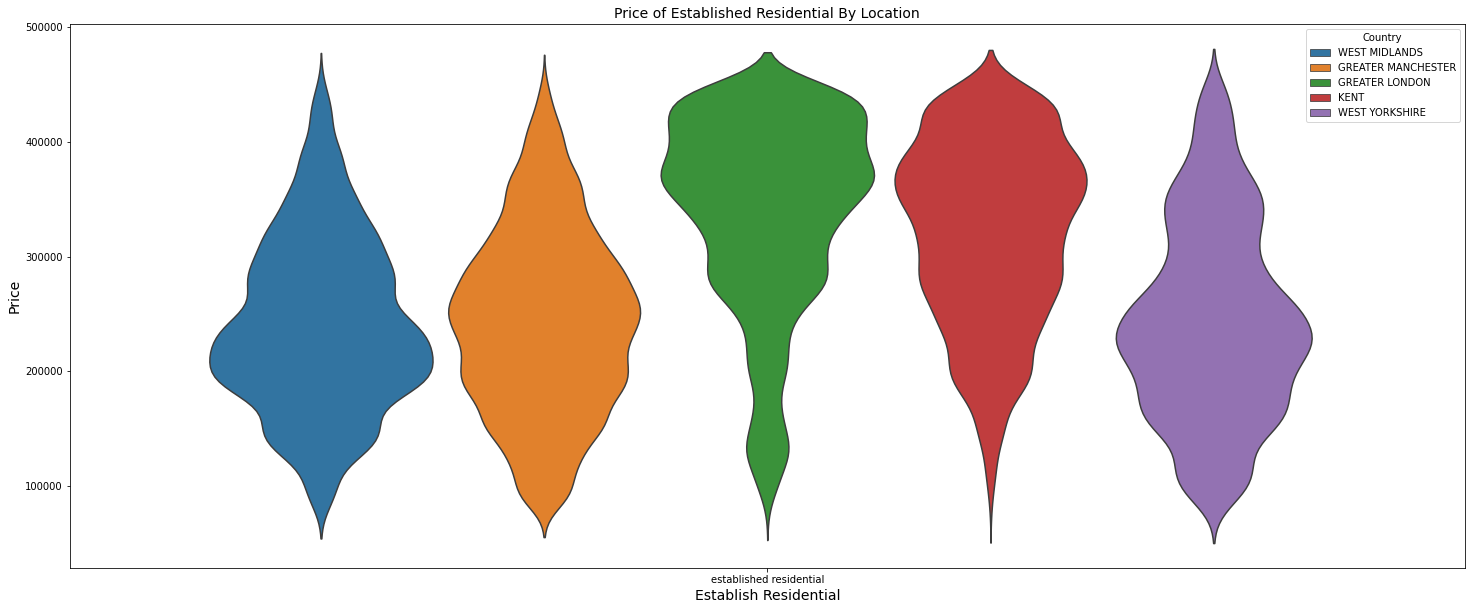

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= t5NewEstablish , x = 'Old/New', y = 'Price', inner= None, hue= 'Country');
plt.xlabel('Establish Residential', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price of Established Residential By Location', fontsize = 14);

The five countries have their highest prices at £450,000. Greater London's price is more concentrated around £380000; Greater Manchester's price is more concentrated around £280000; West Yorkshire's price is more concentrated around £250000; the West Midlands is more concentrated around £220000; and Kent is more concentrated around £350000.

## Established Residential House Price Distribution Relative to Price by Property Type


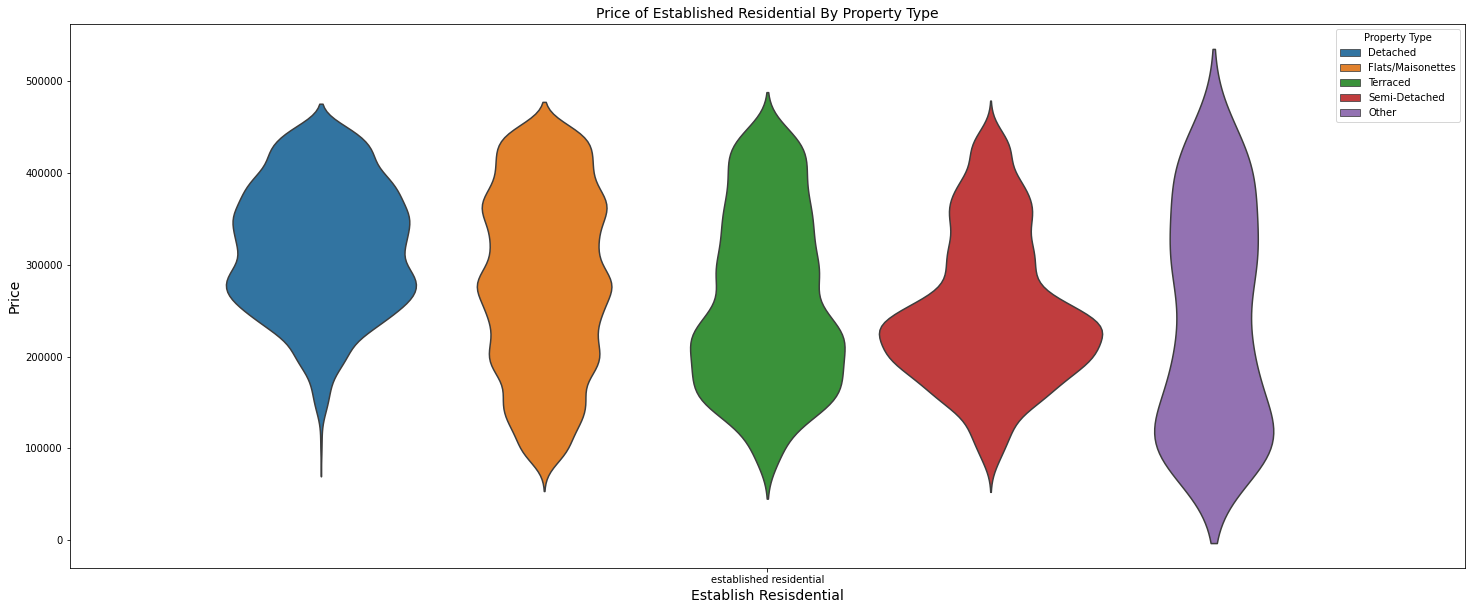

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= t5NewEstablish , x = 'Old/New', y = 'Price', inner= None, hue= 'Property Type');
plt.xlabel('Establish Resisdential', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price of Established Residential By Property Type', fontsize = 14);


The highest price for the four property types is £450,000, with detached house more concentrated around £280000, flats and maisonettes more concentrated at around £380000 and £280000, and terraced house more concentrated from £150000 to £200000, while semi-detached house is more concentrated around £200000.


In [ ]:
Ctop5MaskDetached = Ctop5Mask.loc[Ctop5Mask['Property Type'] == 'Detached']
Ctop5MaskDetached.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03
27,{BC8936BB-BC4F-0E2C-E053-6C04A8C0DBF4},234950.0,2020-03-27,WV10 6FF,Detached,Newly built,Freehold,2,NaN,CADWELL CRESCENT,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03
163,{BC8936BB-A181-0E2C-E053-6C04A8C0DBF4},325000.0,2020-12-18,CT6 6QX,Detached,Newly built,Freehold,9,NaN,THE PADDOCKS,NaN,HERNE BAY,CANTERBURY,KENT,Standard Price,2020-12
164,{BC8936BB-A182-0E2C-E053-6C04A8C0DBF4},376000.0,2020-12-04,ME10 4TY,Detached,Newly built,Freehold,44,NaN,MERLIN CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,Standard Price,2020-12
194,{BC8936BB-A44E-0E2C-E053-6C04A8C0DBF4},343000.0,2020-12-22,CT16 3JA,Detached,Newly built,Freehold,23,NaN,NAPCHESTER ROAD,WHITFIELD,DOVER,DOVER,KENT,Standard Price,2020-12


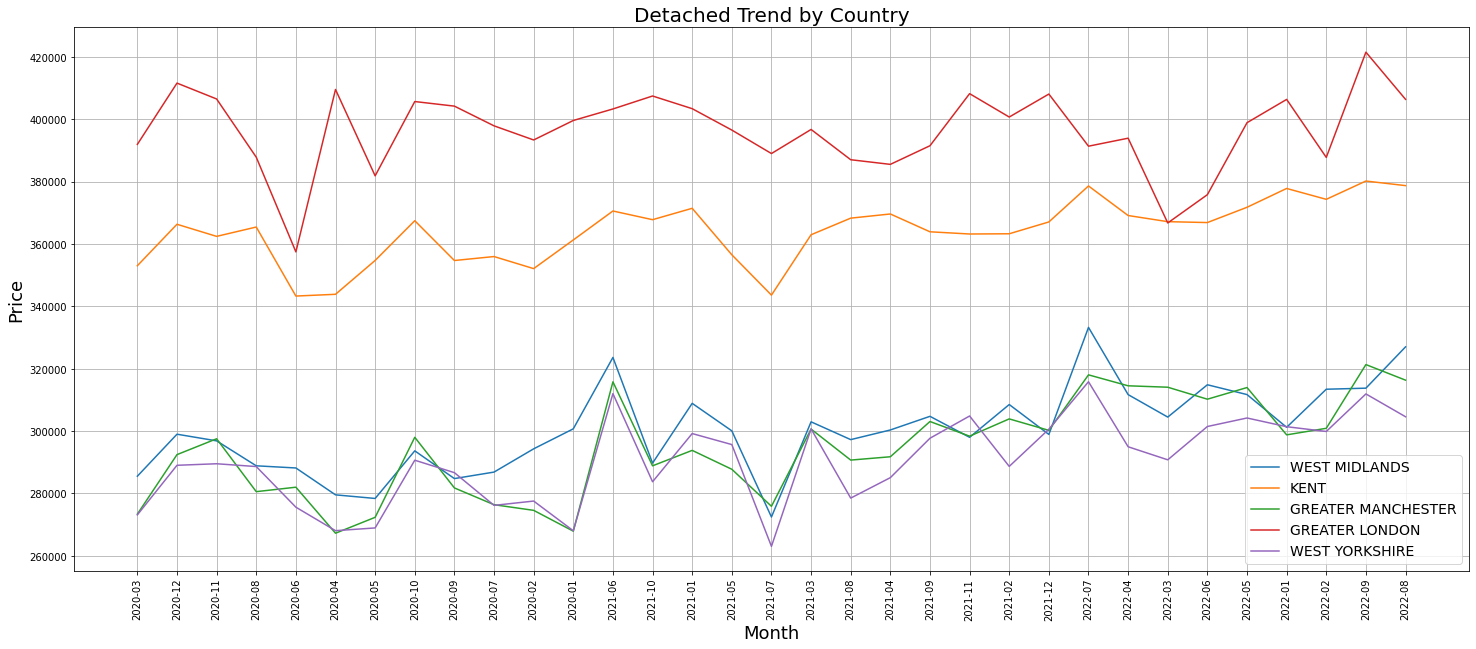

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data=Ctop5MaskDetached, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 14);

#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.title('Detached Trend by Country', fontsize = 20);

#grid
plt.grid()

 <UL>
 <li>At the country level, the largest annual Detached price is Greater London. The highest peak is observed in September 2022 and is above £420000 while the lowest peak is observed in June 2020 and is £359000 </li> 
 

<li>Kent: The highest peak of the price is observed in September 2022 and is ab £380000 while the lowest peak is observed in June 2020 and is £358000</li>


<li>Greater Machester: The highest peak of the price is observed in September 2022 and is £320000 while the lowest peak is observed in April 2022 and is £270000</li>


<li>West Midlands: The highest peak of the price is observed in July 2022 and is £338000 while the lowest peak is observed in July 2021 and is £278000</li>


<li>West Yorkshire: The highest peak of the price is observed in July 2022 and is £310800 while the lowest peak is observed in July 2021 and is £264000</li>

In [ ]:
Ctop5MaskDetached['pctChange_price'] = round(Ctop5MaskDetached['Price'].pct_change()*100)
Ctop5MaskDetached.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03,NaN
27,{BC8936BB-BC4F-0E2C-E053-6C04A8C0DBF4},234950.0,2020-03-27,WV10 6FF,Detached,Newly built,Freehold,2,NaN,CADWELL CRESCENT,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03,21.0
163,{BC8936BB-A181-0E2C-E053-6C04A8C0DBF4},325000.0,2020-12-18,CT6 6QX,Detached,Newly built,Freehold,9,NaN,THE PADDOCKS,NaN,HERNE BAY,CANTERBURY,KENT,Standard Price,2020-12,38.0
164,{BC8936BB-A182-0E2C-E053-6C04A8C0DBF4},376000.0,2020-12-04,ME10 4TY,Detached,Newly built,Freehold,44,NaN,MERLIN CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,Standard Price,2020-12,16.0
194,{BC8936BB-A44E-0E2C-E053-6C04A8C0DBF4},343000.0,2020-12-22,CT16 3JA,Detached,Newly built,Freehold,23,NaN,NAPCHESTER ROAD,WHITFIELD,DOVER,DOVER,KENT,Standard Price,2020-12,-9.0


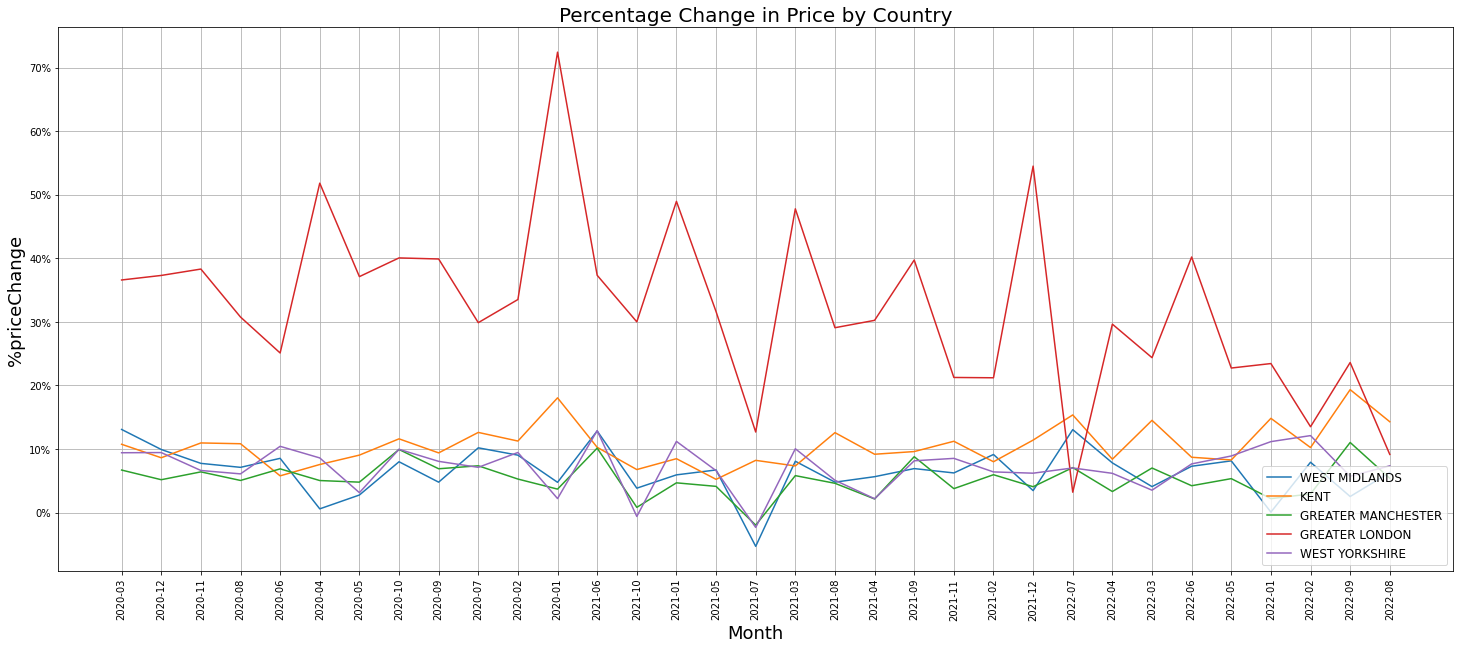

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=Ctop5MaskDetached, x= 'Month_Year', y = 'pctChange_price', hue= 'Country', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 12);

#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('%priceChange', fontsize = 18)
plt.title('Percentage Change in Price by Country', fontsize = 20);

#grid
plt.grid()


<ul>
<li>At the country level, the largest annual detached price growth in the year to September 2022 was recorded in Greater London, where house prices increased by 24%. The highest peak of the price growth is observed in Junuary 2022 and is above 70%, while the lowest peak is observed in July 2022 and is 4%.</li>

<li>Detached house prices in Kent increased by 19% in the year to September 2022. The highest peak of the price growth is observed in September 2022 and is 19% increased, while the lowest peak is observed in June 2022 and is 6% increased.</li>

<li>Detached house prices in Greater Manchester  increased by 11% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and is 10% increased, while the lowest peak is observed in July 2021 and is -8% increased.</li>

<li>In the year to September 2022, detached house prices in the West Midlands will rise by 4%.The highest peak of the price growth is observed in March 2020, July 2020, June 2021 and is 12%, while the lowest peak is observed in July 2021 and is -6% increased.</li>

<li>West Yorkshire detached house prices increased by 0.6% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and is 12% increased, while the lowest peak is observed in July 2021 and is 0% increased.</li>

In [ ]:
#masking Greater London and Greater manchester for semi detached
semiDetached = df.loc[(df['Property Type'] == 'Semi-Detached') & ((df['Country'] == 'GREATER LONDON') | (df['Country'] == 'GREATER MANCHESTER'))]
semiDetached.head()

In [ ]:
semiDetached['Country'].unique()

In [ ]:
semiDetached['Property Type'].unique()

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data= semiDetached, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 12);

#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.title('Semi-detached Trend by Country', fontsize = 20);

#grid
plt.grid()

* Semi-detached in Greater London has its highest peak in July 2022 with an average price of £399500 and its lowest peak in April 2020 with an average price of £370000.

* Semi-detached in Greater Manchester has its highest peak in September 2022 with an average price of £250200 and its lowest peak in April 2020 with an average price below £200000

In [ ]:
semiDetached['pctChange_price'] = round(semiDetached['Price'].pct_change()*100)
semiDetached.head()

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=semiDetached, x= 'Month_Year', y = 'pctChange_price', hue= 'Country', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 10);

#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('%priceChange', fontsize = 18)
plt.title('Semi_Detached% Change in Price by Country', fontsize = 20);

#grid
plt.grid()


* In the year to September 2022, semi-detached house prices in Greater London increased by 33%.The highest peak of the price growth is observed in January 2020 by 47%, while the lowest peak is observed in April 2020 with a 17% growth rate.

* Semi-detached house prices in Greater Manchester increased by 12% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and increased by 18%, while the lowest peak is observed in July 2021 with a -5% growth rate.

In [ ]:
semiDetached.groupby('Country')['Price'].mean()

* The average price of a semi-detached property in the Greater London area was £386755.

* A semi-detached house in Greater Manchester cost on average £220066.

In [ ]:
#masking Greater London and Greater manchester for Terraced
Terraced = df.loc[(df['Property Type'] == 'Terraced') & ((df['Country'] == 'GREATER LONDON') | (df['Country'] == 'GREATER MANCHESTER'))]
Terraced.head()

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data= Terraced, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 12);

#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.title('Terraced Trend by Country', fontsize = 20);

#grid
plt.grid()

* Terraced in Greater London has its highest peak in September 2022 with an average price of £380000 and its lowest peak in July 2021 with an average price of £350000.

* Terraced in Greater Manchester has its highest peak in June 2021 with an average price of £180000 and its lowest peak in April 2020 with an average price below £150000

In [ ]:
Terraced.groupby('Country')['Price'].mean()

In [ ]:
Terraced['pctChange_price'] = round(Terraced['Price'].pct_change()*100)
Terraced.head()

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=Terraced, x= 'Month_Year', y = 'pctChange_price', hue= 'Country', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 12);

#label
plt.xlabel('Month', fontsize = 18)
plt.ylabel('%priceChange', fontsize = 18)
plt.title('Percentage Change in Price by Country', fontsize = 20);

#grid
plt.grid()


* In the year to September 2022, Terraced house prices in Greater London increased by 22.5%.The highest peak of the price growth is observed in December 2020 and it is 27%, while the lowest peak is observed in July 2021 with a 7% growth rate.

* Terraced house prices in Greater Manchester increased by 14% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and is 18%, while the lowest peak is observed in October 2021 with a 0.2% growth rate.

## Time Series

In [ ]:
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.impute import SimpleImputer
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact, fixed,interactive, fixed, interact_manual
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline as make_pipeline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df2 = df[['Date of Transfer', 'Price']]
df2 = df2.set_index('Date of Transfer')
df2

In [ ]:
#localizing the timezome 
df2.index = df2.index.tz_localize("UTC").tz_convert("Europe/London")
df2.index[:5]

In [ ]:
fig,ax =plt.subplots(figsize = (15,6))
df2['Price'].plot(kind = 'box', vert = False, title = 'House Price Distribution', ax = ax);

In [ ]:
#resample to 12Hr window
df2 = df2['Price'].resample('12H').mean().fillna(method = 'ffill').to_frame()


In [ ]:
df2.tail

In [ ]:
fig,ax =plt.subplots(figsize = (25,10))
df2['Price'].plot(xlabel = "Time", ylabel = "Price", title = "Price Time_Series",ax = ax);

In [ ]:
#rolling average for a week for 
#smooting our data
df2['Price'].rolling(14).mean()

In [ ]:
df2['Price'].rolling(14).mean().isnull().sum()

In [ ]:
fig, ax = plt.subplots(figsize= (25,10))
df2['Price'].rolling(14).mean().plot(ax = ax, title = 'Weekly Rolling Average', xlabel = 'Time', ylabel = 'Price')

In [ ]:
df2['Price.L1'] = df2['Price'].shift(1)
df2.dropna(inplace = True)
df2.head() 

In [ ]:
df2.tail()

In [ ]:
df2.corr()

In [ ]:
fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(data = df2, x = 'Price.L1', y = 'Price')
ax.plot([100000,350000], [100000,350000], linestyle = "--", color = 'orange')
plt.xlabel('Price.L1')
plt.ylabel('Price')
plt.title('Price Autocorrelation');

## Scatter plot that shows price mean reading for each hour as a function of the mean reading from the previous 12 hours 

In [ ]:
target = 'Price'
y = df2[target]
X = df2.drop(columns = target)

In [ ]:
X[:5]

In [ ]:
y[:5]

Date of Transfer
2020-01-31 12:00:00+00:00    229936.881634
2020-02-01 00:00:00+00:00    216750.000000
2020-02-01 12:00:00+00:00    216750.000000
2020-02-02 00:00:00+00:00    216782.071429
2020-02-02 12:00:00+00:00    216782.071429
Freq: 12H, Name: Price, dtype: float64

In [ ]:
cutoff =int(len(X) * 0.8)

In [ ]:
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [ ]:
len(X_train + X_test) == len(X)

True

In [ ]:
len(y_train + y_test) == len(y)

True

## Model Building

### Baseline

In [274]:
y_mean = y_train.mean()
y_mean

237132.91560518133

In [275]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[237132.91560518133,
 237132.91560518133,
 237132.91560518133,
 237132.91560518133,
 237132.91560518133]

In [276]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Price Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline))

Mean Price Reading: 237132.92
Baseline MAE: 14731


In [277]:
#instantiate linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [278]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 10230.72
Test MAE: 12128.88


## Communication

In [ ]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]

In [ ]:
intercept

91520.53

In [ ]:
coefficient

0.61

In [ ]:
df_pred_test = pd.DataFrame(
    {
        "y_test" : y_test,
        "y_pred" : model.predict(X_test)
    }
)

df_pred_test.head()

,y_test,y_pred
Date of Transfer,,
2022-03-19 12:00:00+00:00,208071.428571,219280.025374
2022-03-20 00:00:00+00:00,198541.666667,219280.025374
2022-03-20 12:00:00+00:00,198541.666667,213428.584719
2022-03-21 00:00:00+00:00,241082.565896,213428.584719
2022-03-21 12:00:00+00:00,241082.565896,239549.441646


In [ ]:
# time series prediction at 12 hours interval 
fig = px.line(df_pred_test, labels = {'value' : 'Price'})
fig.show()

## AutoRegression

In [284]:
w = df[['Date of Transfer', 'Price']]
w = w.set_index('Date of Transfer')
w

,Price
Date of Transfer,
2020-11-20,176500.0
2020-10-29,97500.0
2020-02-04,180000.0
2020-03-09,196000.0
2020-02-07,140000.0
...,...
2022-07-20,90000.0
2022-09-30,340000.0
2022-09-29,305750.0


In [285]:
#resample to 12Hr window
w = w['Price'].resample('12H').mean().fillna(method = 'ffill')
w.head()

Date of Transfer
2020-01-31 00:00:00    229936.881634
2020-01-31 12:00:00    229936.881634
2020-02-01 00:00:00    216750.000000
2020-02-01 12:00:00    216750.000000
2020-02-02 00:00:00    216782.071429
Freq: 12H, Name: Price, dtype: float64

In [286]:
w.corr(w.shift(1))

0.6033839817801878

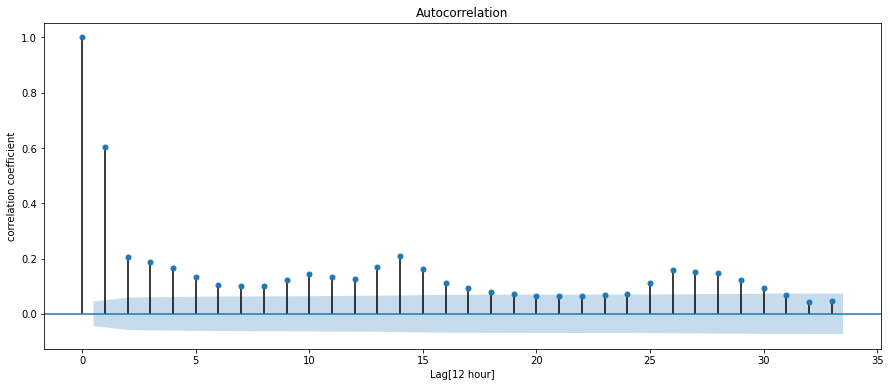

In [287]:

fig, ax = plt.subplots(figsize = (15,6))
plot_acf(w, ax = ax)
plt.xlabel('Lag[12 hour]')
plt.ylabel('correlation coefficient');

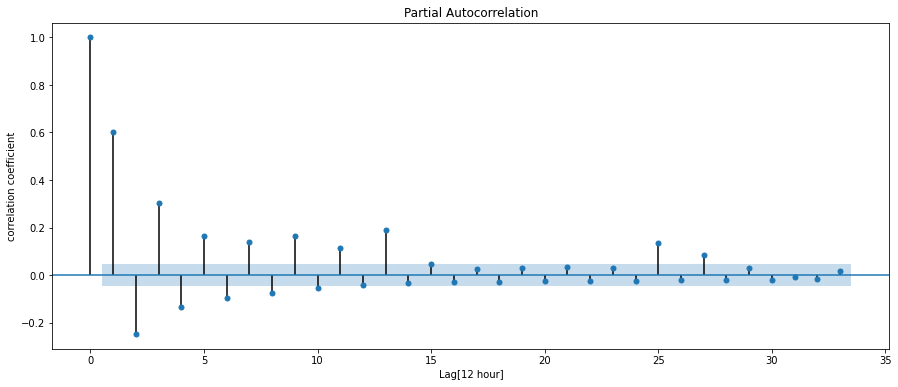

In [288]:
fig, ax = plt.subplots(figsize = (15,6))
plot_pacf(w, ax = ax)
plt.xlabel('Lag[12 hour]')
plt.ylabel('correlation coefficient');

In [289]:
# Splitting
cutoff_test =int(len(w) * 0.95)
y_train = w.iloc[:cutoff_test]
y_test = w.iloc[cutoff_test:]

## BUilding Model

In [290]:
#Baseline
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Price Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline))

Mean Price Reading: 238061.87
Baseline MAE: 14771


In [291]:
len(y_train) + len(y_test) == len(w)

True

In [292]:
model = AutoReg(y_train, lags = 27).fit()

In [293]:
model.predict().isnull().sum()

27

In [294]:
y_pred = model.predict().dropna()
training_mae = mean_absolute_error(y_train.iloc[27:],y_pred)
print(f'Trainning MAE: {training_mae}')

Trainning MAE: 7073.5612839890255


In [295]:
y_train_resid = model.resid
y_train_resid.tail()

Date of Transfer
2022-08-10 00:00:00     4254.082039
2022-08-10 12:00:00     1545.544009
2022-08-11 00:00:00    11676.789455
2022-08-11 12:00:00     1581.410214
2022-08-12 00:00:00     3423.136183
Freq: 12H, dtype: float64

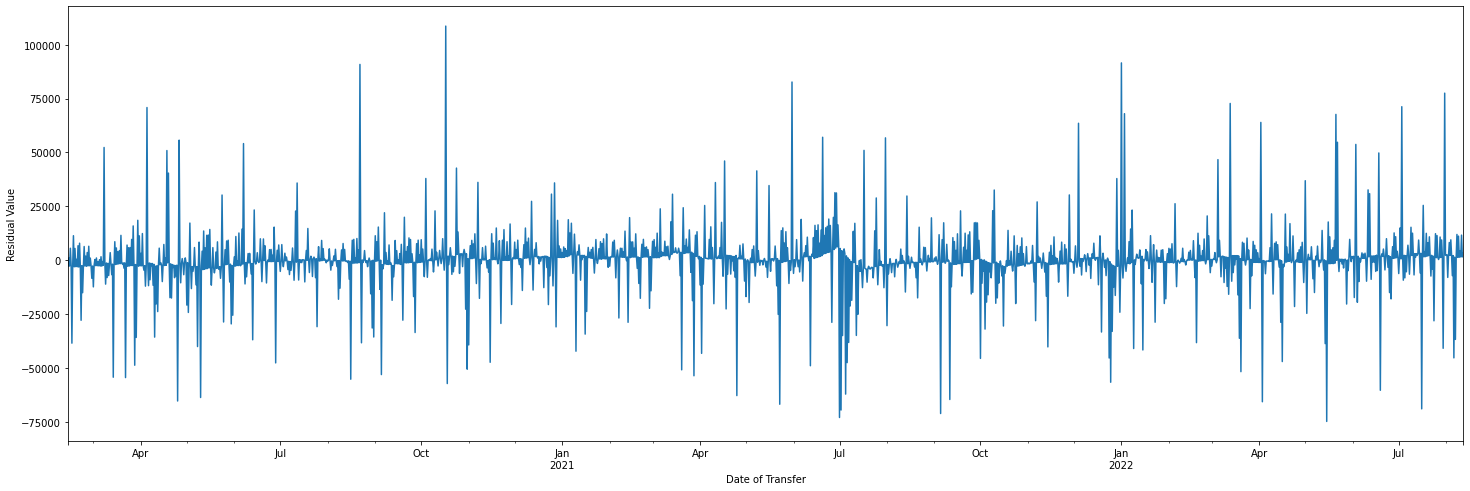

In [296]:
#checking the residual
fig, ax = plt.subplots(figsize = (25,8))
y_train_resid.plot(ax=ax, ylabel = 'Residual Value');


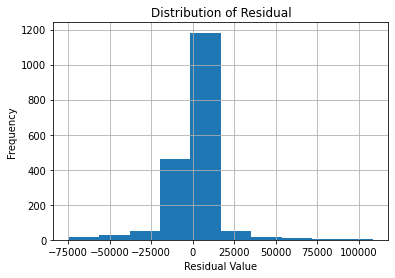

In [297]:
y_train_resid.hist()
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residual');

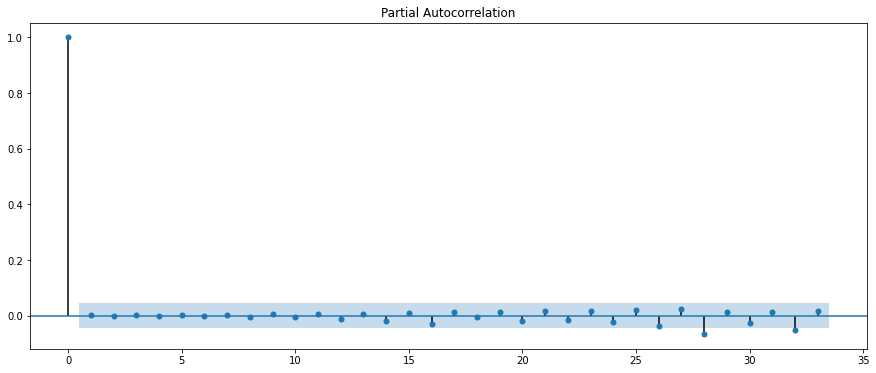

In [298]:
fig, ax = plt.subplots(figsize = (15,6))
plot_pacf(y_train_resid, ax = ax);

In [299]:
y_pred_test = model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f'Test_MAE: {test_mae}')

Test_MAE: 21952.69169487211


This is not well generalized, therefore we make use of walk-forward validation.

In [300]:
%%capture
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
  model = AutoReg(history, lags = 27).fit()
  next_pred = model.forecast()
  y_pred_wfv = y_pred_wfv.append(next_pred)
  history = history.append(y_test[next_pred.index])

In [301]:
mean_absolute_error(y_test, y_pred_wfv)

9931.616384607361

In [302]:
print(model.params)

intercept    41850.205237
Price.L1         0.985543
Price.L2        -0.838556
Price.L3         0.824327
Price.L4        -0.717349
Price.L5         0.704497
Price.L6        -0.669521
Price.L7         0.656911
Price.L8        -0.620363
Price.L9         0.608106
Price.L10       -0.522748
Price.L11        0.512355
Price.L12       -0.482554
Price.L13        0.472273
Price.L14       -0.328942
Price.L15        0.318483
Price.L16       -0.299190
Price.L17        0.288512
Price.L18       -0.289759
Price.L19        0.277912
Price.L20       -0.267687
Price.L21        0.255464
Price.L22       -0.246701
Price.L23        0.234134
Price.L24       -0.234292
Price.L25        0.219523
Price.L26       -0.099502
Price.L27        0.084301
dtype: float64


In [303]:
df_pred_test = pd.DataFrame(
    {
        "y_test" : y_test,
        "y_pred_wfv" :y_pred_wfv}
)


In [304]:
fig = px.line(df_pred_test, labels = {'value' : 'Price'})
fig.show()